In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K
from keras.models import Sequential
from keras.layers import *
from keras.utils import *
from keras.optimizers import *
from keras.callbacks import *
from keras.metrics import *
from tensorflow.keras import initializers

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

from collections import *
from sklearn.utils import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Import data

In [4]:
### import the data
tesla_data = pd.read_csv("..//..//data preparation//4.tesla_twitter_data_aggregated_prices.csv")
#tesla_data = tesla_data.drop(columns=['Subjuctivity','Polarity'])
tesla_data.head()

,date,comment_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,total_count_tweet,Open,Close,change,Class_target
0,2015-01-02,43,136,58.117857,24.628968,25,102,75,253,14.858000,14.620667,0.000000,0.0
1,2015-01-03,10,89,19.596165,6.015433,6,58,26,115,14.858000,14.620667,0.000000,0.0
2,2015-01-04,11,75,21.760570,7.227273,9,81,30,155,14.858000,14.620667,0.000000,0.0
3,2015-01-05,23,201,78.210868,36.700063,17,148,111,356,14.303333,14.006000,-4.204097,-1.0
4,2015-01-06,22,155,57.585345,17.047315,20,150,65,271,14.004000,14.085333,0.566422,1.0


In [5]:
tesla_data['date'] = pd.to_datetime(tesla_data['date'])
tesla_data.head()

,date,comment_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,total_count_tweet,Open,Close,change,Class_target
0,2015-01-02,43,136,58.117857,24.628968,25,102,75,253,14.858000,14.620667,0.000000,0.0
1,2015-01-03,10,89,19.596165,6.015433,6,58,26,115,14.858000,14.620667,0.000000,0.0
2,2015-01-04,11,75,21.760570,7.227273,9,81,30,155,14.858000,14.620667,0.000000,0.0
3,2015-01-05,23,201,78.210868,36.700063,17,148,111,356,14.303333,14.006000,-4.204097,-1.0
4,2015-01-06,22,155,57.585345,17.047315,20,150,65,271,14.004000,14.085333,0.566422,1.0


## create target column of from close price : target_close

In [6]:
tesla_data['target_close'] = tesla_data['Close'].shift(-1)
tesla_data

,date,comment_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,total_count_tweet,Open,Close,change,Class_target,target_close
0,2015-01-02,43,136,58.117857,24.628968,25,102,75,253,14.858000,14.620667,0.000000,0.0,14.620667
1,2015-01-03,10,89,19.596165,6.015433,6,58,26,115,14.858000,14.620667,0.000000,0.0,14.620667
2,2015-01-04,11,75,21.760570,7.227273,9,81,30,155,14.858000,14.620667,0.000000,0.0,14.006000
3,2015-01-05,23,201,78.210868,36.700063,17,148,111,356,14.303333,14.006000,-4.204097,-1.0,14.085333
4,2015-01-06,22,155,57.585345,17.047315,20,150,65,271,14.004000,14.085333,0.566422,1.0,14.063333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-28,688,5253,235.425825,62.305687,112,227,310,1549,29.000000,28.691999,-0.129954,-1.0,28.691999
1822,2019-12-29,673,6425,218.909844,42.348362,130,243,259,1471,29.000000,28.691999,-0.129954,-1.0,27.646667
1823,2019-12-30,1494,13014,479.708670,111.280921,235,508,615,3559,28.586000,27.646667,-3.643287,-1.0,27.888666
1824,2019-12-31,936,9674,397.183524,100.569139,193,453,480,2212,27.000000,27.888666,0.875328,1.0,27.888666


In [7]:
tesla_data = tesla_data.drop([1825])
tesla_data.head()

,date,comment_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,total_count_tweet,Open,Close,change,Class_target,target_close
0,2015-01-02,43,136,58.117857,24.628968,25,102,75,253,14.858000,14.620667,0.000000,0.0,14.620667
1,2015-01-03,10,89,19.596165,6.015433,6,58,26,115,14.858000,14.620667,0.000000,0.0,14.620667
2,2015-01-04,11,75,21.760570,7.227273,9,81,30,155,14.858000,14.620667,0.000000,0.0,14.006000
3,2015-01-05,23,201,78.210868,36.700063,17,148,111,356,14.303333,14.006000,-4.204097,-1.0,14.085333
4,2015-01-06,22,155,57.585345,17.047315,20,150,65,271,14.004000,14.085333,0.566422,1.0,14.063333


In [8]:
tesla_data.columns

Index(['date', 'comment_num', 'like_num', 'Subjuctivity', 'Polarity',
       'Class_sentiment_negative', 'Class_sentiment_neutral',
       'Class_sentiment_positive', 'total_count_tweet', 'Open', 'Close',
       'change', 'Class_target', 'target_close'],
      dtype='object')

## correlation

In [10]:

### select the features to work on
Data = tesla_data.copy()
Data = Data[['date',
             'like_num',
             'comment_num',
             'Class_sentiment_negative', 'Class_sentiment_positive', 'Polarity',
             'total_count_tweet',
             'Close',
             'target_close'
            ]]

Data = Data.sort_values(['date'])
Data

,date,like_num,comment_num,Class_sentiment_negative,Class_sentiment_positive,Polarity,total_count_tweet,Close,target_close
0,2015-01-02,136,43,25,75,24.628968,253,14.620667,14.620667
1,2015-01-03,89,10,6,26,6.015433,115,14.620667,14.620667
2,2015-01-04,75,11,9,30,7.227273,155,14.620667,14.006000
3,2015-01-05,201,23,17,111,36.700063,356,14.006000,14.085333
4,2015-01-06,155,22,20,65,17.047315,271,14.085333,14.063333
...,...,...,...,...,...,...,...,...,...
1820,2019-12-27,13873,1467,239,582,109.940483,3659,28.691999,28.691999
1821,2019-12-28,5253,688,112,310,62.305687,1549,28.691999,28.691999
1822,2019-12-29,6425,673,130,259,42.348362,1471,28.691999,27.646667
1823,2019-12-30,13014,1494,235,615,111.280921,3559,27.646667,27.888666


Text(0.5, 1.0, 'The correlation between features')

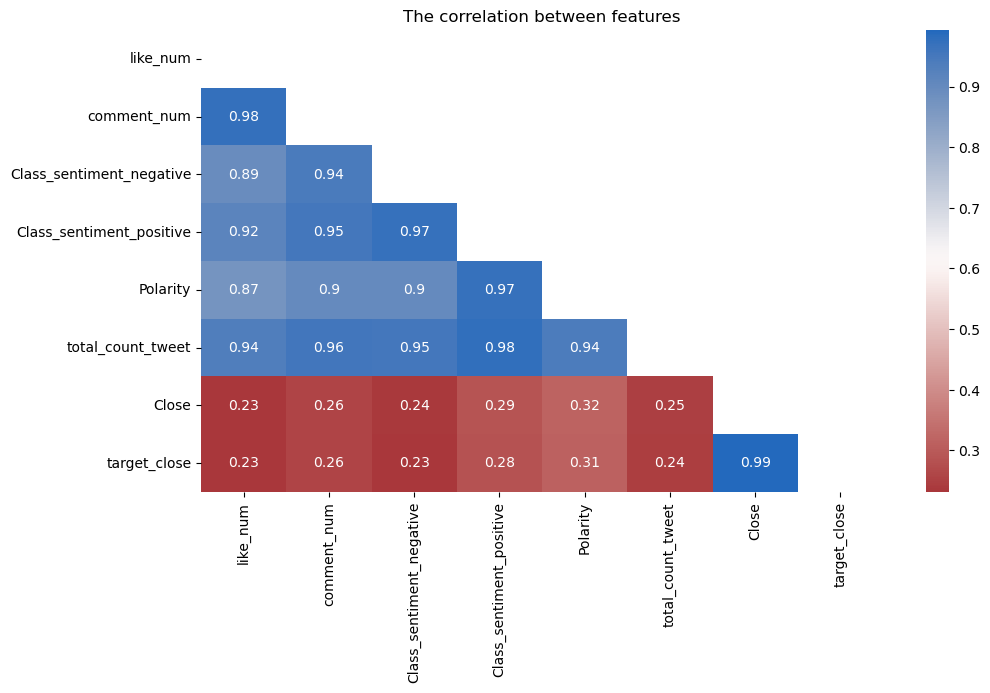

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 6)
mask = np.triu(np.ones_like(Data.corr(), dtype=bool))
sns.heatmap(np.abs(Data.corr()), mask=mask, annot=True, cmap='vlag_r', ax=ax)
plt.title('The correlation between features')

In [12]:
# select features to use

In [13]:
### select the eatures to work on
Data = tesla_data.copy()
Data = Data[['date',
             #'like_num',
             #'comment_num',
             'Class_sentiment_negative', 'Class_sentiment_positive', #'Polarity',
             #'total_count_tweet',
             'Close',
             'target_close'
            ]]

Data = Data.sort_values(['date'])

## scaling and creating data sequence 

In [15]:
#Data[c] = (Data[c] - Data[c].min()) / (Data[c].max() - Data[c].min())
trg_min = Data['target_close'].min()
trg_max = Data['target_close'].max()
trg_min,trg_max

(9.578, 28.729334)

In [16]:
#Scaling each column separately
for c in Data.columns[1:]:
    Data[c] = (Data[c] - Data[c].min()) / (Data[c].max() - Data[c].min())

In [17]:
WINDOW_SIZE = 3
data_x, data_y = [], []

for i in range(WINDOW_SIZE,len(Data)):
    data_x.append(Data.iloc[i-WINDOW_SIZE:i, 1:-1])
    data_y.append((Data.iloc[i, -1]))

In [18]:
data_x, data_y = np.array(data_x), np.array(data_y)

## spliting data

In [19]:
# training-validation data/ testing data
limiter = 8 * (data_x.shape[0] // 10)

trainV_data_x = data_x[:limiter, :, :]
trainV_data_y = data_y[:limiter]

test_data_x = data_x[limiter:, :, :]
test_data_y = data_y[limiter:]

In [20]:
# training data/ validation data
limiterValid = 8 * (trainV_data_x.shape[0] // 10)

valid_data_x = trainV_data_x[limiterValid:, :, :]
valid_data_y = trainV_data_y[limiterValid:]

train_data_x = trainV_data_x[:limiterValid, :, :]
train_data_y = trainV_data_y[:limiterValid]

In [21]:
valid_data_x.shape,valid_data_y.shape

((296, 3, 3), (296,))

In [22]:
valid_data_y[:10]

array([0.63877185, 0.70261424, 0.68983879, 0.63689208, 0.63330664,
       0.61851211, 0.61851211, 0.61851211, 0.59139478, 0.58091687])

In [23]:
train_data_x.shape,train_data_y.shape

((1160, 3, 3), (1160,))

In [24]:
train_data_y[:10]

array([0.23535347, 0.23420473, 0.23305598, 0.21927104, 0.21927104,
       0.21927104, 0.20378043, 0.21088176, 0.17064085, 0.16778638])

In [25]:
test_data_x.shape,test_data_y.shape

((366, 3, 3), (366,))

In [26]:
test_data_y[:10]

array([0.65837012, 0.57942006, 0.54544503, 0.60577154, 0.60577154,
       0.60577154, 0.66588923, 0.66724684, 0.67831651, 0.70073442])

# Training

In [27]:
kernel_initializer=initializers.RandomNormal(stddev=0.01)
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)

model = Sequential()


model.add(LSTM(units=60, activation='relu',
               input_shape=(int(train_data_x.shape[1]),int(train_data_x.shape[2])),
               return_sequences=True))

model.add(LSTM(units=35 ,return_sequences=False))
model.add(Dense(1))
model.add(Activation('relu'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 60)             15360     
                                                                 
 lstm_1 (LSTM)               (None, 35)                13440     
                                                                 
 dense (Dense)               (None, 1)                 36        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 28,836
Trainable params: 28,836
Non-trainable params: 0
_________________________________________________________________


In [28]:
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [29]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[r2])

In [30]:
history = model.fit(train_data_x, train_data_y, epochs=100, batch_size=48, validation_data=(valid_data_x, valid_data_y), verbose=1, callbacks=[
    ReduceLROnPlateau(monitor="val_r2", patience=15, factor=.1),
    EarlyStopping(monitor="val_loss", min_delta=1e-2, patience=45)
])

Epoch 1/100
25/25 [==============================] - 7s 59ms/step - loss: 0.1055 - r2: -1.7411 - val_loss: 0.0307 - val_r2: -7.4407 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0170 - r2: 0.5448 - val_loss: 0.0107 - val_r2: -2.0357 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0080 - r2: 0.7898 - val_loss: 0.0038 - val_r2: 0.0869 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0014 - r2: 0.9615 - val_loss: 0.0045 - val_r2: 0.1084 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0011 - r2: 0.9708 - val_loss: 0.0037 - val_r2: 0.2428 - lr: 0.0010
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 9.9649e-04 - r2: 0.9730 - val_loss: 0.0038 - val_r2: 0.2334 - lr: 0.0010
Epoch 7/100
25/25 [==============================] - 0s 9ms/step - loss: 9.8246e-04 - r2: 0.9734 - val_loss: 0.0037 - val_r2: 0.2677 - lr: 0

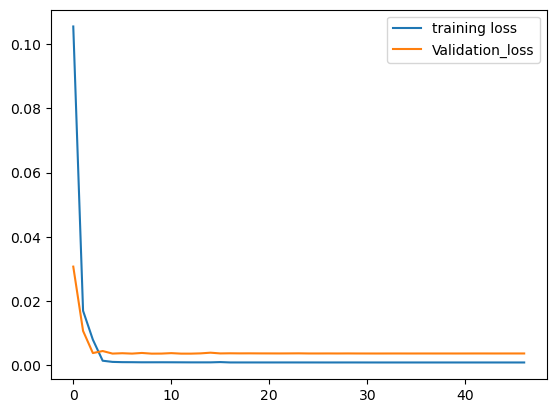

In [31]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.legend()

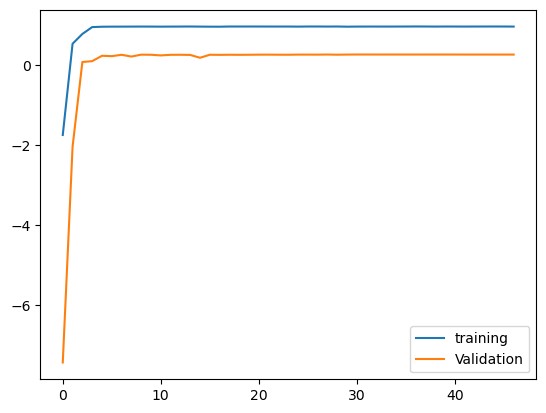

In [32]:
plt.plot(history.history['r2'], label='training')
plt.plot(history.history['val_r2'], label='Validation')
plt.legend()

In [33]:
predictions = model.predict(test_data_x)

12/12 [==============================] - 1s 3ms/step


In [34]:
Predictions = []
for i in range(len(predictions)):
    Predictions.append(predictions[i]*(trg_max-trg_min)+trg_min)

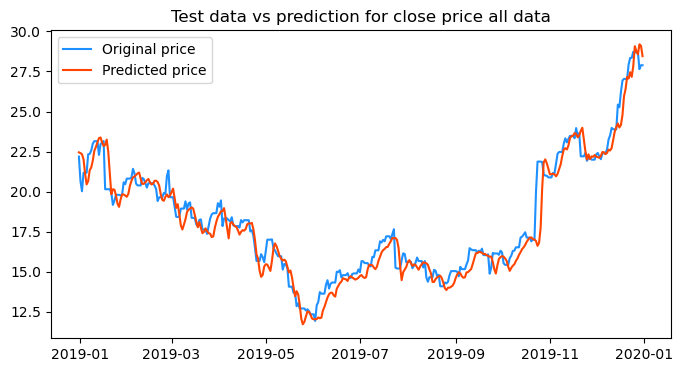

In [35]:
results = {'date' : tesla_data.date[limiter+WINDOW_SIZE:],
           'original': tesla_data.target_close[limiter+WINDOW_SIZE:],
          'predictions':Predictions
          }
df_results = pd.DataFrame(results) 
df_results.date = pd.to_datetime(df_results.date)
df_results.index = df_results.date

fig, ax = plt.subplots(figsize=(8,4))
ax.set_facecolor('#FFFFFF')
ax.plot(df_results['original'], color='dodgerblue', label='Original price')
plt.plot(df_results['predictions'], color='orangered', label='Predicted price')
plt.title('Test data vs prediction for close price all data')
plt.legend()

In [36]:
r2 = r2_score(df_results['original'], df_results['predictions'])
mse = mean_squared_error(df_results['original'], df_results['predictions'])
mae = mean_absolute_error(df_results['original'], df_results['predictions'])
rmse = np.sqrt(mse)
print('R2 score is -> ', r2)
print('RMSE is -> ', rmse)

R2 score is ->  0.9385849418293291
RMSE is ->  0.8910832700340409


In [37]:
df_results

,date,original,predictions
date,,,
2018-12-31,2018-12-31,22.186666,[22.451418]
2019-01-01,2019-01-01,20.674667,[22.405857]
2019-01-02,2019-01-02,20.024000,[22.333609]
2019-01-03,2019-01-03,21.179333,[22.016289]
2019-01-04,2019-01-04,21.179333,[21.125622]
...,...,...,...
2019-12-27,2019-12-27,28.691999,[28.772465]
2019-12-28,2019-12-28,28.691999,[28.569996]
2019-12-29,2019-12-29,27.646667,[29.197144]
